In [6]:
import numpy as np
import time
from sklearn import datasets
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
from matplotlib import pyplot as plt

In [3]:
iris_dataset = datasets.load_iris()

X = iris_dataset.data
Y = iris_dataset.target

In [10]:
class T2FCM: 
  def __init__(self, X, k, options):
    self.expo_lower = options[0]
    self.expo_upper = options[1]
    max_iter = options[2]
    min_impro = options[3]
    display = options[4]

    data_n = np.size(X, 0);
    self.obj_fcn = []

    U_lower= np.random.rand(k, data_n)
    col_sum_lower = np.sum(U_lower, axis=0)
    U_lower =np.divide(U_lower, col_sum_lower)
    U_upper = np.random.rand(k, data_n) 
    col_sum_upper = np.sum(U_upper, axis=0)
    U_upper = np.divide(U_upper, col_sum_upper)

    for i in range(0, max_iter):
          mf_lower = np.power(U_lower, self.expo_lower);
          mf_upper = np.power(U_upper,self.expo_upper);

          self.center_lower = np.divide(mf_lower@X,(np.sum(mf_lower,axis=1))[:,None]);
          self.center_upper = np.divide(mf_upper@X,(np.sum(mf_upper,axis=1))[:,None]);

          dist_lower = euclidean_distances(self.center_lower, X);
          dist_upper = euclidean_distances(self.center_upper, X);
          
          tmp_lower = np.power(dist_lower,(-2/(self.expo_lower-1)));
          U_m1 = np.divide(tmp_lower, np.sum(tmp_lower,axis=0));
          tmp_upper = np.power(dist_upper,(-2/(self.expo_upper-1)));
          U_m2 = np.divide(tmp_upper,np.sum(tmp_upper,axis=0));    
          
          U_lower = np.minimum(U_m1,U_m2);
          U_upper = np.maximum(U_m1,U_m2);
          U = np.mean(np.array([U_lower,U_upper]), axis=0);
          mf = np.power(U,((self.expo_lower+self.expo_upper)/2))

          self.center = np.mean(np.array([self.center_lower,self.center_upper]), axis=0);
          dist = euclidean_distances(self.center, X)
          self.obj_fcn.append(np.sum(np.multiply(np.power(dist,2),mf)))

           

  def MF_Compute(self, X):
    dist_lower = euclidean_distances(self.center_lower, X);
    print(self.center_lower)
    print(X)
    dist_upper = euclidean_distances(self.center_upper, X);
    
          
    tmp_lower = np.power(dist_lower,(-2/(self.expo_lower-1)));
    U_m1 = np.divide(tmp_lower, np.sum(tmp_lower,axis=0));
    tmp_upper = np.power(dist_upper,(-2/(self.expo_upper-1)));
    U_m2 = np.divide(tmp_upper,np.sum(tmp_upper,axis=0));    
          
    U_lower = np.minimum(U_m1,U_m2);
    U_upper = np.maximum(U_m1,U_m2);
    U = np.mean(np.array([U_lower,U_upper]), axis=0);
    mf = np.power(U,((self.expo_lower+self.expo_upper)/2))
    return mf

  def predict(self, tst): 
    dist = euclidean_distances(self.center, tst)
    mf = self.MF_Compute(tst)
    pred= np.multiply(np.power(dist,2),mf)
    return pred

[[5.89353508 2.75906594 4.378613   1.40773051]
 [6.79375677 3.05577063 5.66426514 2.05750763]
 [5.0020615  3.41326871 1.47922495 0.25212128]]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

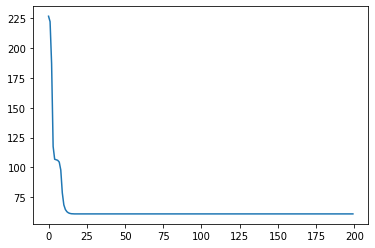

In [11]:
k=len(np.unique(Y))
opts = [1.5 , 2.5 , 200 , 1e-5, 0]
ob = T2FCM(X, k, opts)
plt.plot(ob.obj_fcn)
dec = ob.predict(X)
np.argmax(dec, axis=0)

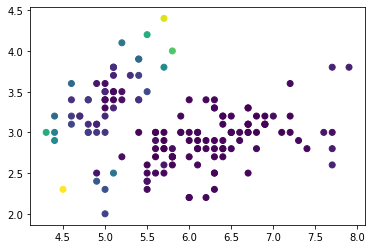

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=dec[2,:])